In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_score = log_reg.decision_function(X_test)

e:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_score), np.max(decision_score), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_score >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

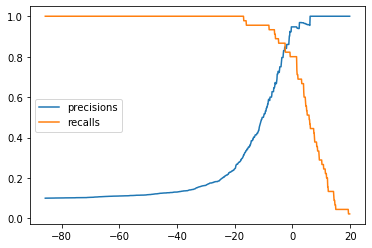

In [11]:
plt.plot(thresholds, precisions,label = 'precisions')
plt.plot(thresholds, recalls, label = 'recalls')
plt.legend()

### Precision - Recall 曲线

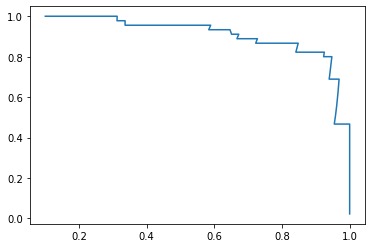

In [12]:
# 随着 precisions 逐渐增大，recalls 逐渐减小
plt.plot(precisions, recalls)

### scikit - learn 中的 Precision - Recall 曲线

In [13]:
from sklearn.metrics import precision_recall_curve

precisions, recalls , thresholds = precision_recall_curve(y_test, decision_score)

In [14]:
precisions.shape

(145,)

In [15]:
recalls.shape

(145,)

In [16]:
thresholds.shape

(144,)

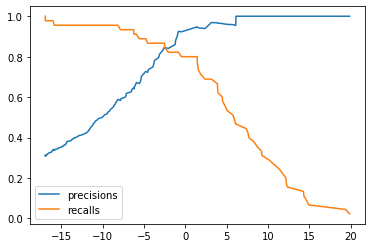

In [18]:
plt.plot(thresholds, precisions[: -1], label = 'precisions')
plt.plot(thresholds, recalls[: -1], label = 'recalls')
plt.legend()

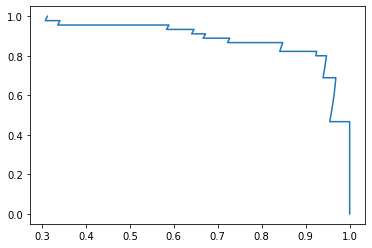

In [19]:
plt.plot(precisions, recalls)